Objective:
The primary objective of this assignment is to understand and implement different clustering techniques for customer segmentation. You are required to interpret the significance of the clusters formed and provide actionable insights.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.express as px


Topic: Clustering based on the payment+spending behavior

In [4]:
df = pd.read_csv('C:/Users/User/Desktop/Customer_Data.csv')

In [5]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
# Check number of unknowns
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
#missing value in Minimum Payments fill in zero if payment is zero, otherwise with the mean of payments
df['MINIMUM_PAYMENTS'] = df.apply(
    lambda row: 0 if row['PAYMENTS'] == 0 else (df['PAYMENTS'].median() if pd.isnull(row['MINIMUM_PAYMENTS']) else row['MINIMUM_PAYMENTS']),
    axis=1
)

In [9]:
#missing value in credit_limit
df = df.dropna(subset=['CREDIT_LIMIT'])

In [10]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
df1 = df[['PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
'PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']]

Spending patterns:
'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
'PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_TRX'

Payment behavios:
'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'

Exploratory Data Analysis (EDA)

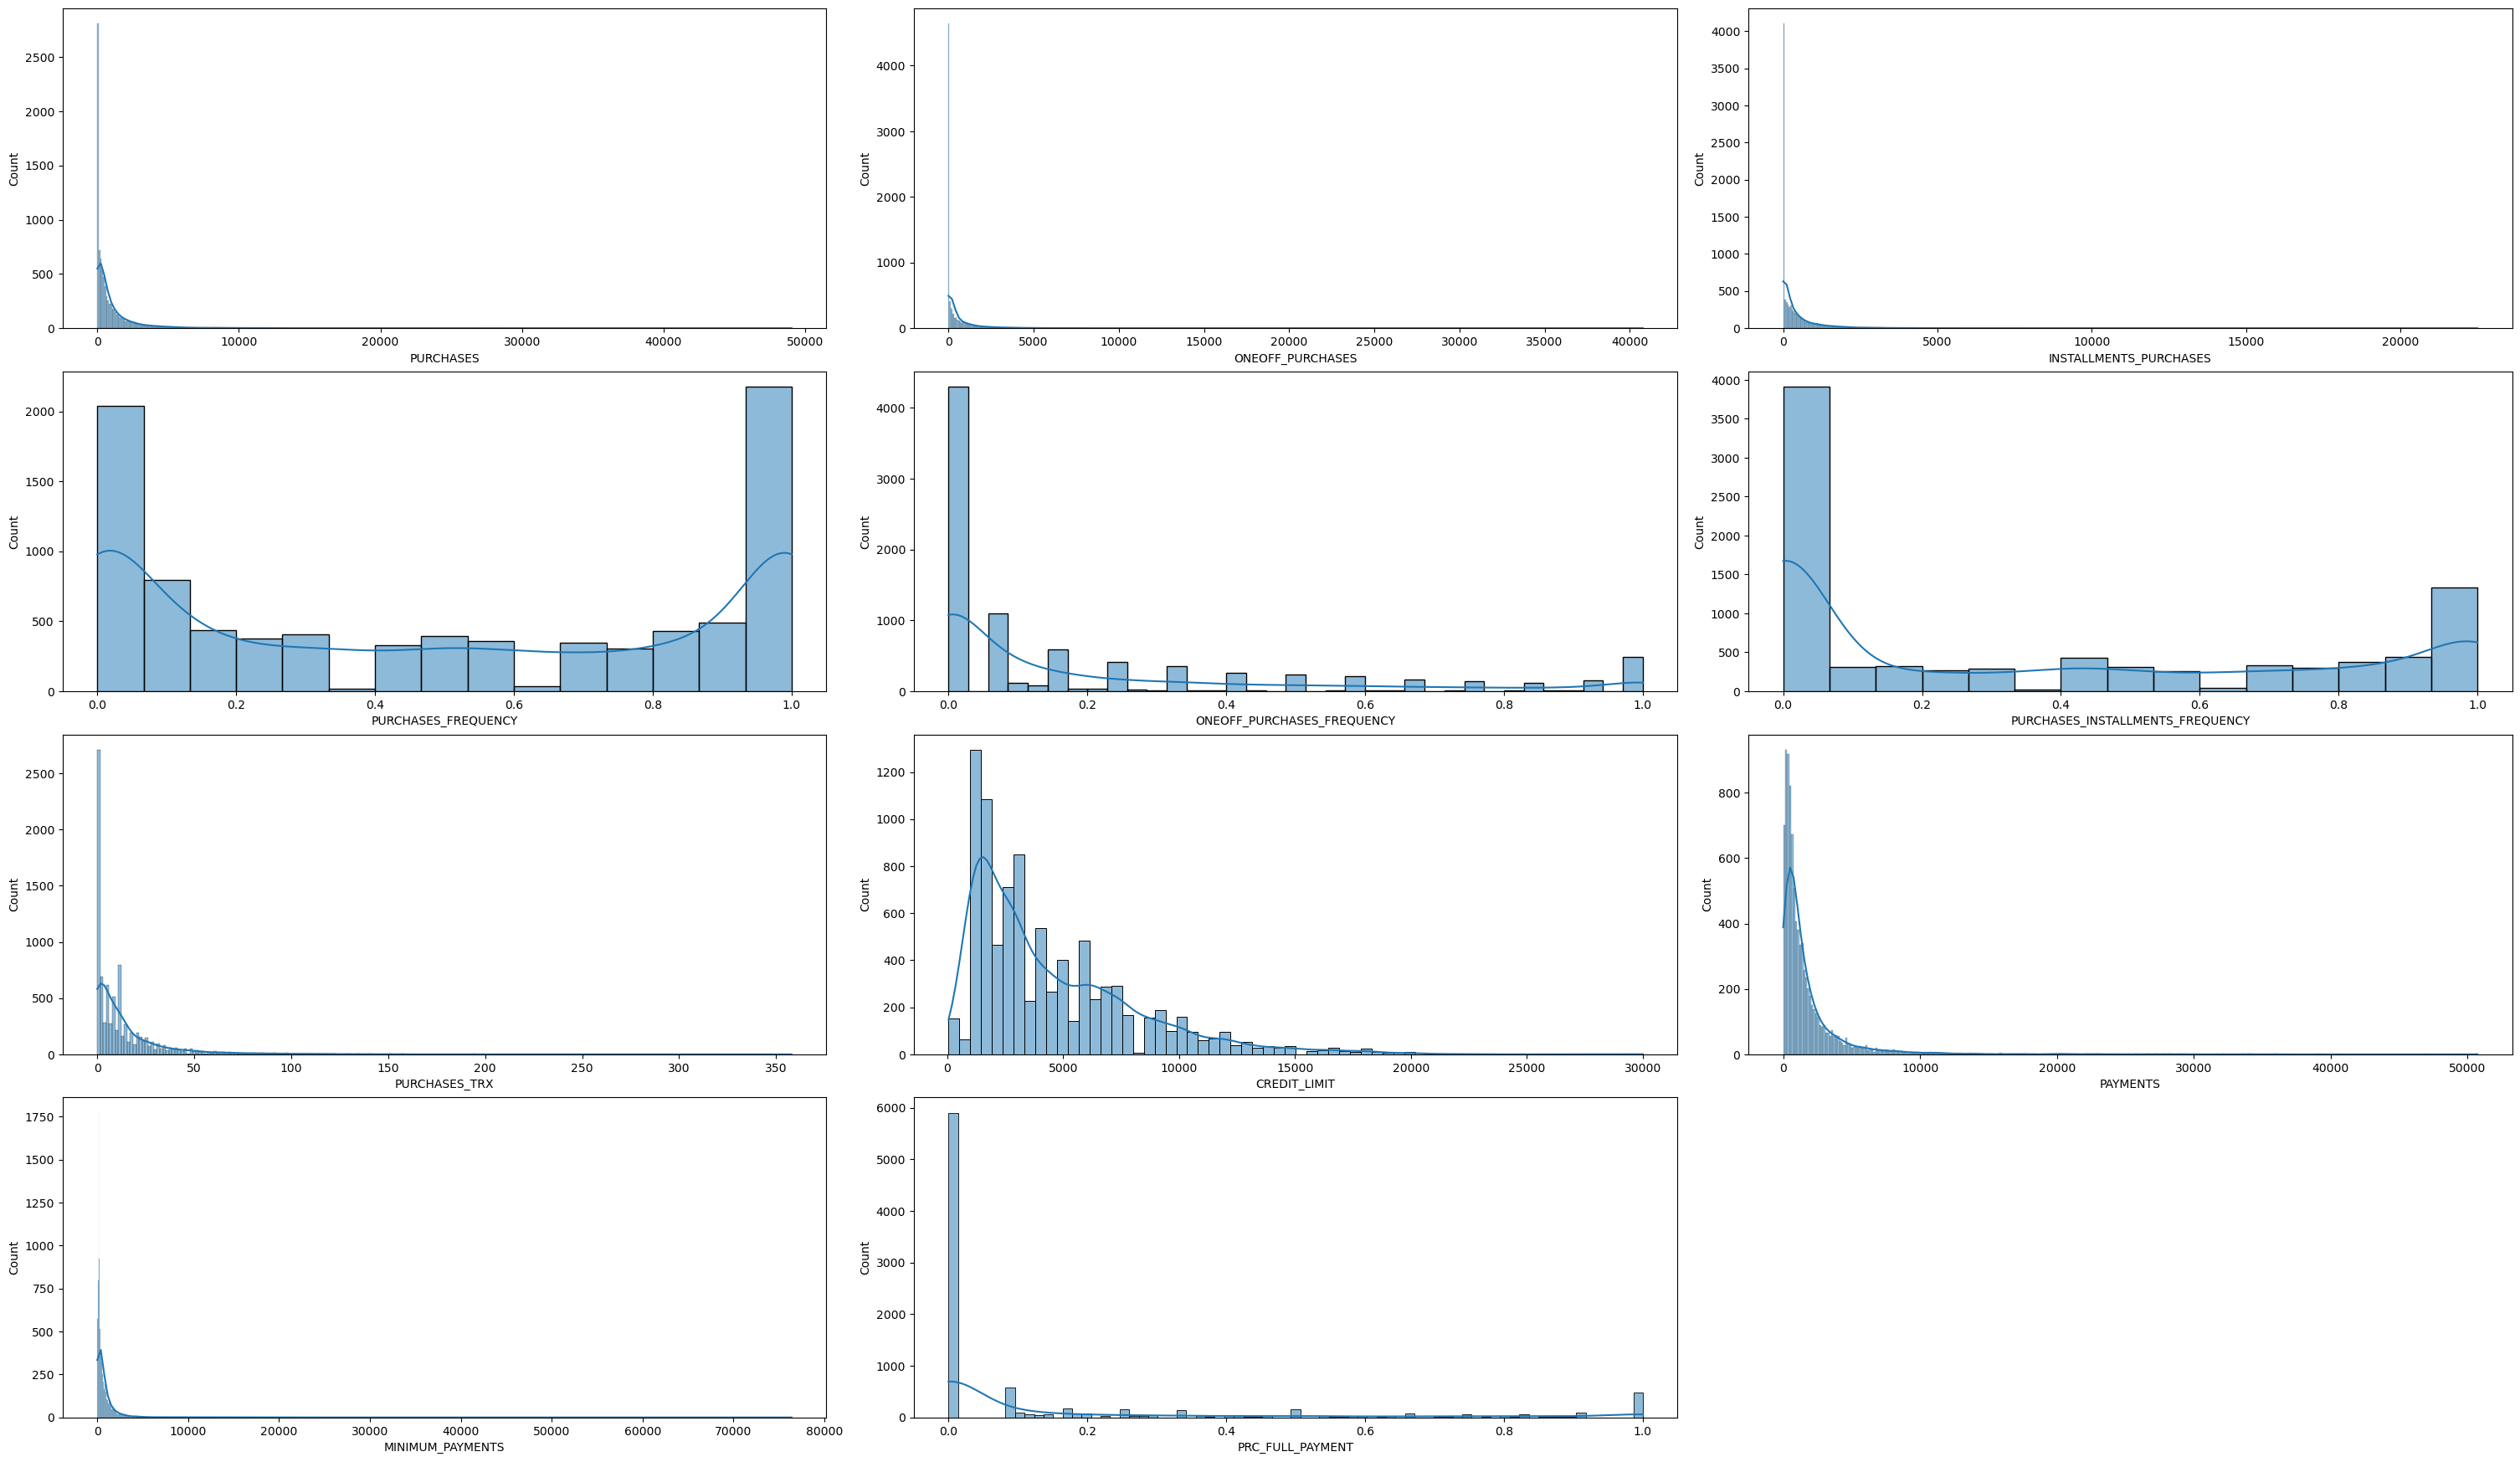

In [12]:
# creating distribution plot for analysis
fig = plt.figure(figsize=(30, 25), constrained_layout=True)
for i in range(len(df1.columns)):
    plt.subplot(6, 3, i+1)
    sns.histplot(df1[df1.columns[i]], kde=True)

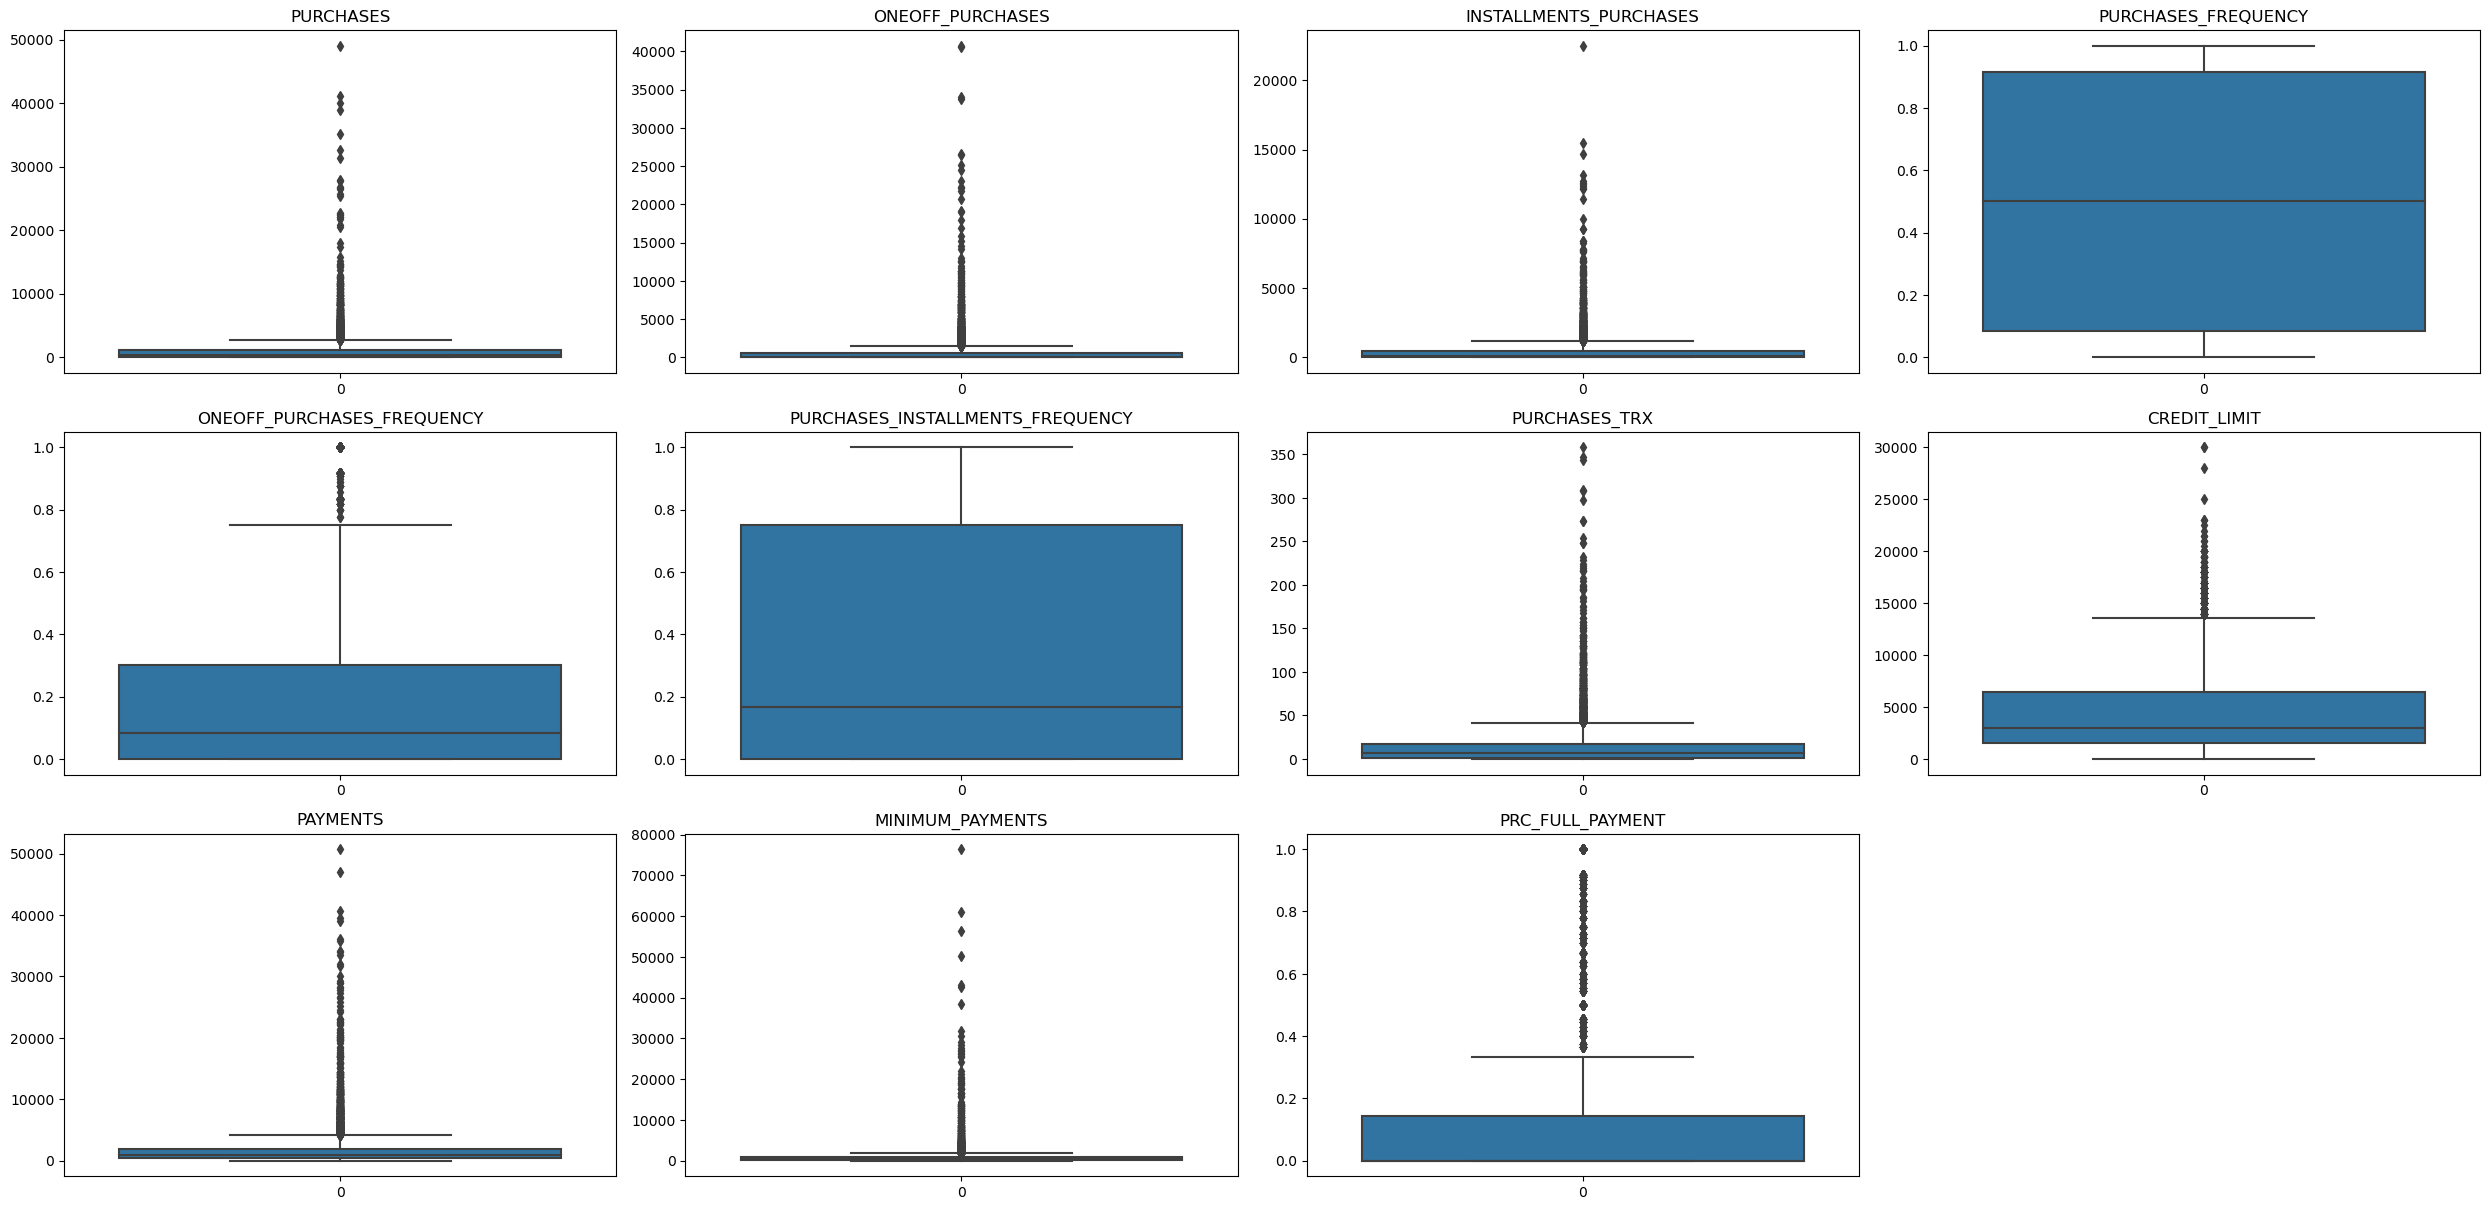

In [13]:
# plot for outliers detection

plt.figure(figsize=(25,20))
for i in range(len(df1.columns)):
    plt.subplot(5,4,i+1)
    sns.boxplot(df1[df1.columns[i]])
    plt.title(df1.columns[i])
    
plt.tight_layout()

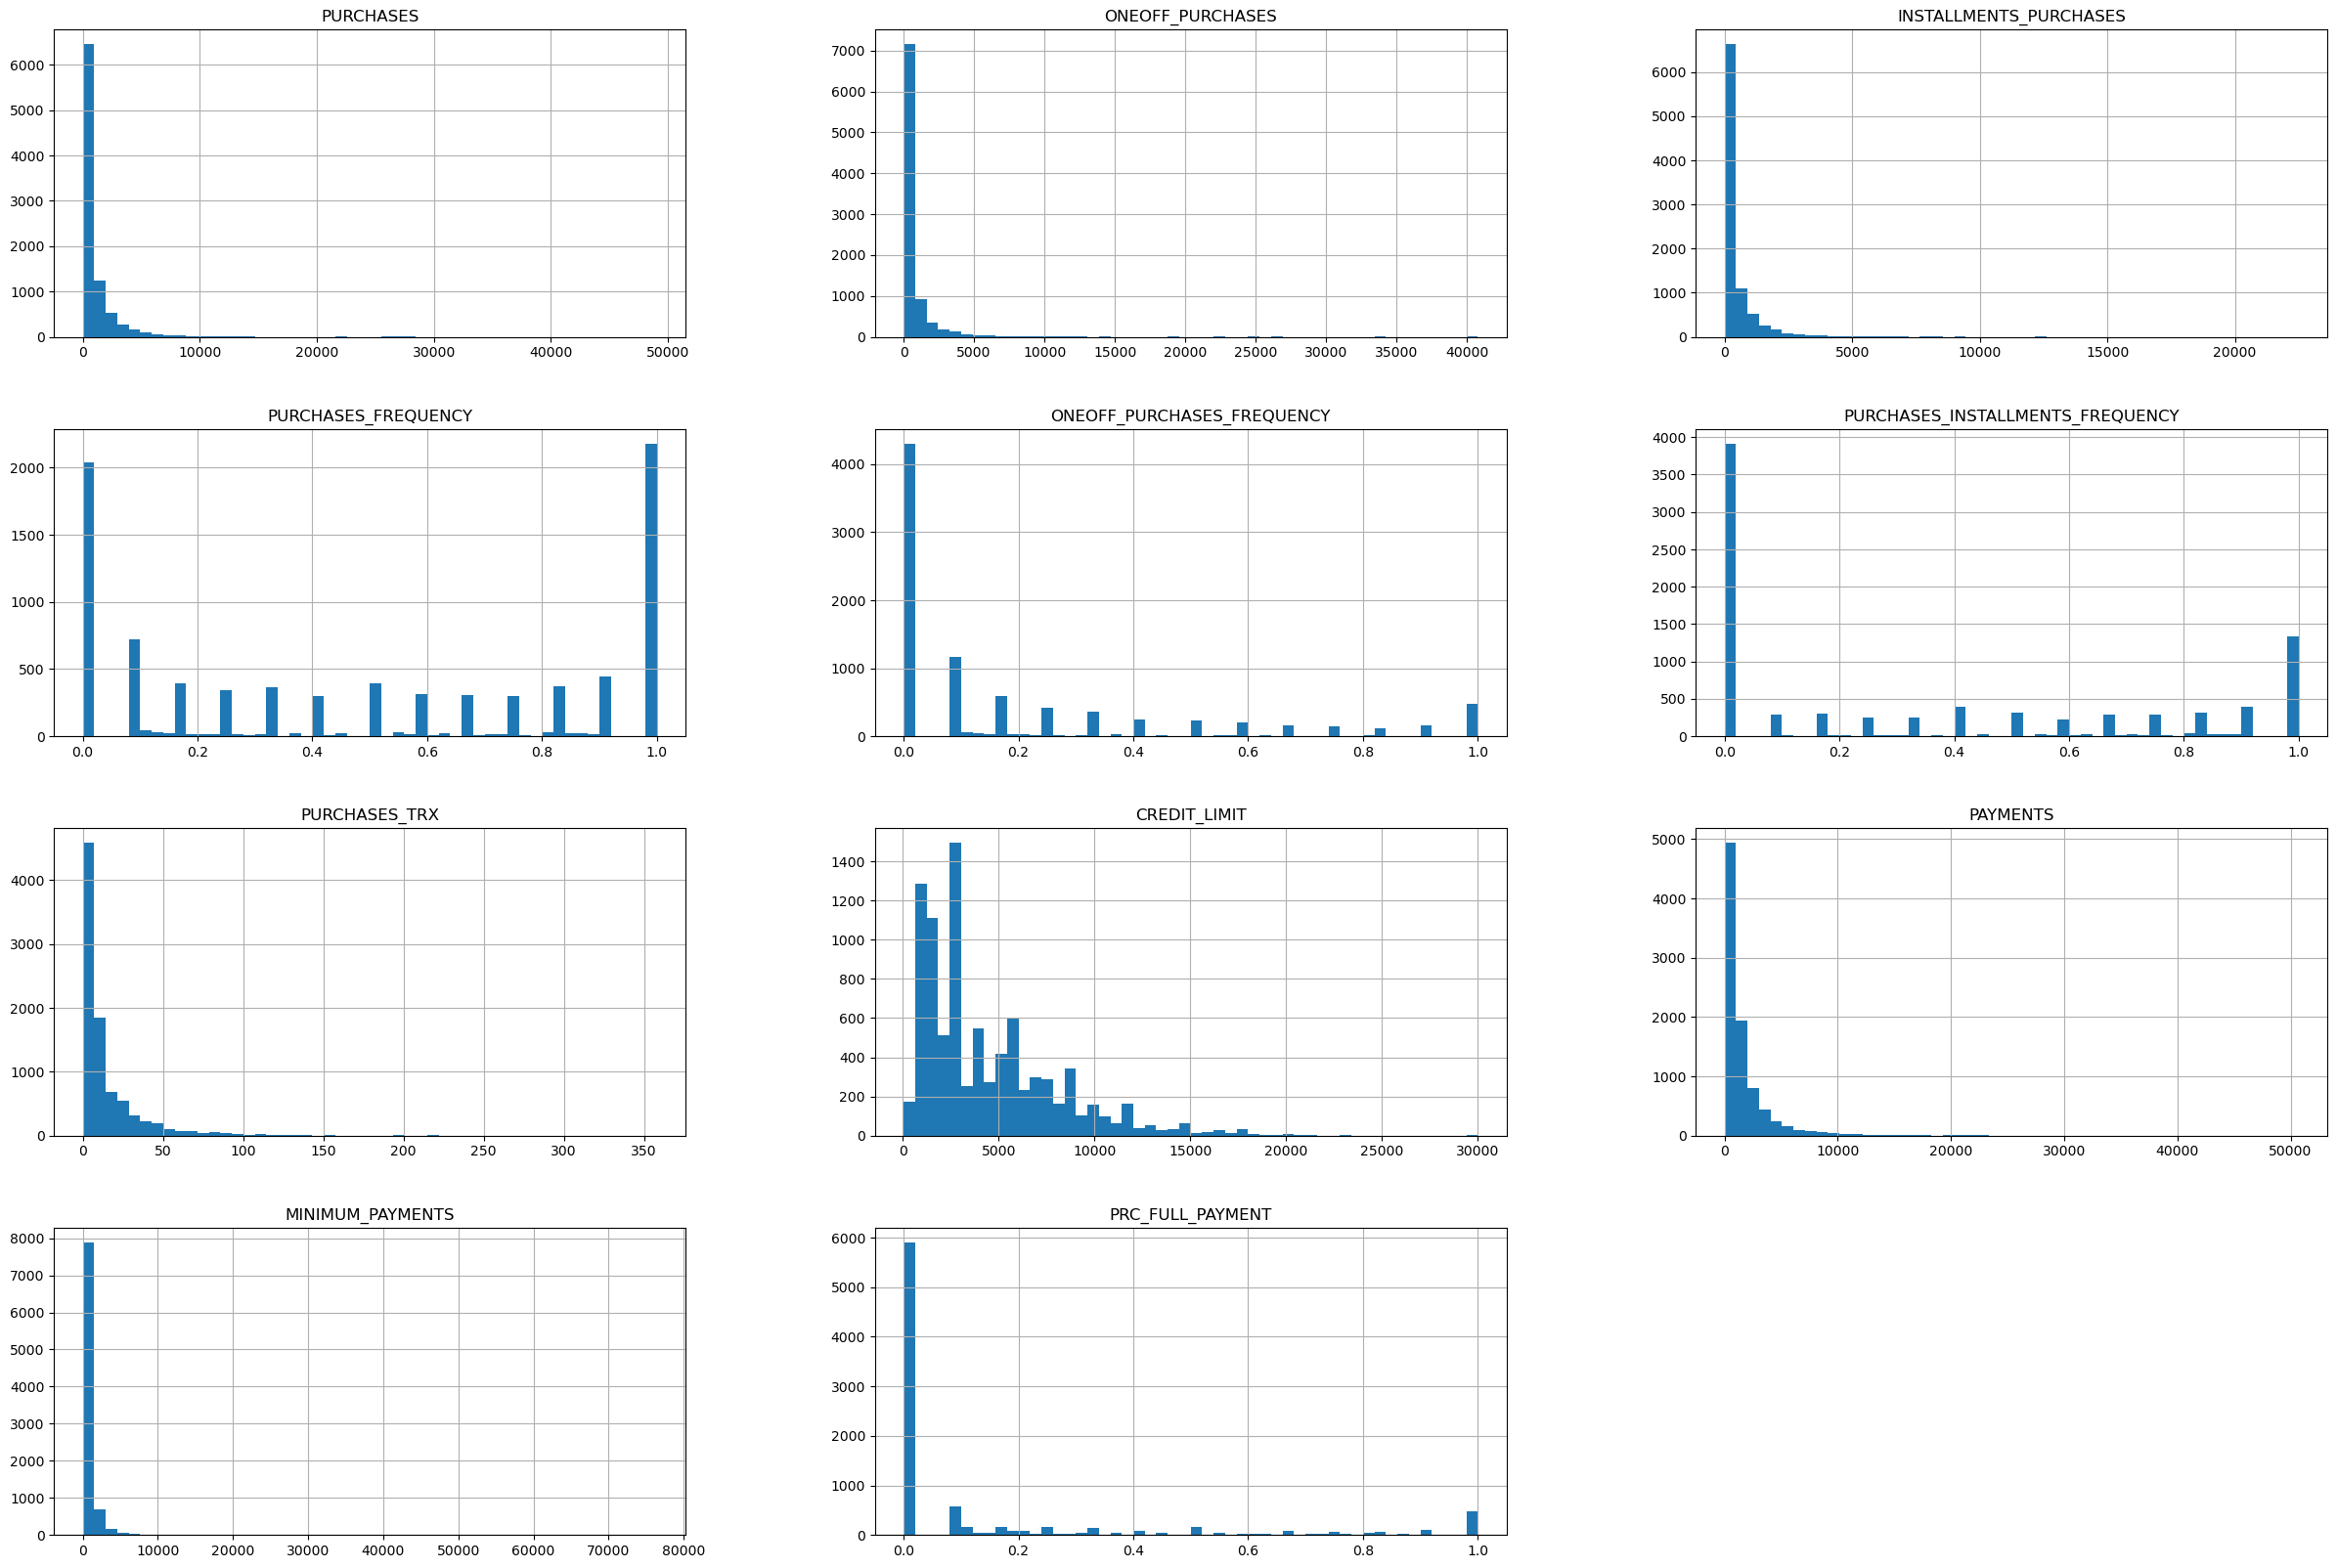

In [14]:
# Distribution plot to visualize data distribution

hist_b_ho = df1.hist(bins=50,figsize=(30,20))
hist_b_ho
plt.show()

In [15]:
#handling outlier with winsorization
# Cap/floor outliers using quantiles
capped_data = df1.copy()
upper_bound = df1.quantile(0.9)
capped_data = capped_data.clip(upper=upper_bound, axis=1)

In [16]:
#running PCA with full components
pca_all = PCA(n_components=len(df1.columns))
pca_all.fit(df1)
variance = pca_all.explained_variance_ratio_
var = np.cumsum(variance)*100

#plot for information extracted
fig = px.line(x=np.arange(len(df1.columns))+1, y=var, markers=True)
fig.update_xaxes(title_text='# of Features')
fig.update_yaxes(title_text='% Variance Explained')
fig.update_layout(width=900)

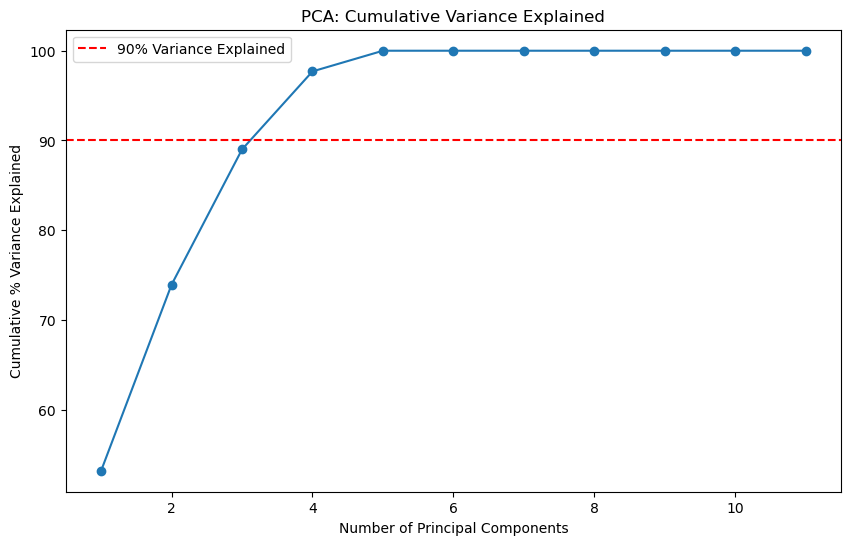

In [44]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Assuming your dataset is in a DataFrame called final_data
pca = PCA(n_components=len(df1.columns))
pca.fit(df1)

# Calculate the cumulative variance explained by each component
variance_explained = np.cumsum(pca.explained_variance_ratio_) * 100

# Plot the cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_explained) + 1), variance_explained, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative % Variance Explained')
plt.title('PCA: Cumulative Variance Explained')
plt.axhline(y=90, color='r', linestyle='--', label='90% Variance Explained')
plt.legend()
plt.show()


In [45]:
# Use PCA to keep enough components to explain at least 90% of the variance
pca = PCA(n_components=0.9)  # Retain components explaining 90% variance
pca_data = pca.fit_transform(df1)

print(f"Number of components explaining 90% variance: {pca.n_components_}")

Number of components explaining 90% variance: 4


In [17]:
# Step 1: Feature Scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df1)

# Step 2: Dimensionality Reduction using PCA
pca = PCA(n_components = 4)
data_pca = pca.fit_transform(data_scaled)

In [18]:
# Results after scaling and PCA
scaled_columns = pd.DataFrame(data_scaled)
pca_columns = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])

In [19]:
pca_columns

,PC1,PC2,PC3,PC4
0,-0.492363,-0.110175,-0.034649,-0.089333
1,-0.610514,-0.012425,0.199910,0.129689
2,0.281026,0.859208,-0.389648,-0.168557
3,-0.575703,0.021734,-0.045598,0.105281
4,-0.583542,-0.005773,-0.038859,-0.076064
...,...,...,...,...
8944,0.667378,-0.303275,0.290554,-0.156604
8945,0.567891,-0.403338,-0.188871,-0.160090
8946,0.394499,-0.287082,0.082687,-0.150457
8947,-0.612635,-0.035296,0.232752,-0.072135


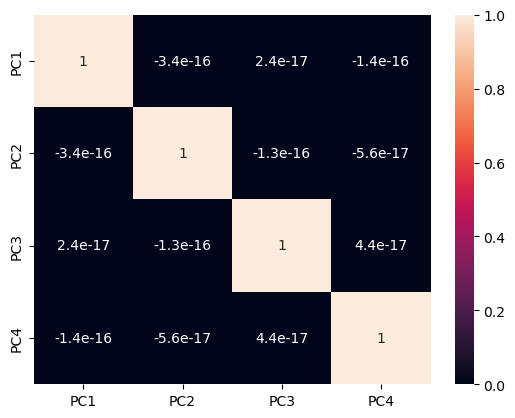

In [20]:
#Heatmap check
sns.heatmap(pca_columns.corr(), annot=True);

Modeling
- K-MEANS
- DBSCAN
- K-Meoids

K-means

In [21]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Handling Warning
import warnings
warnings.filterwarnings('ignore')

In [22]:
inertia = []
silh = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i) 
    kmeans.fit(pca_columns)
    inertia.append(kmeans.inertia_)
    silh.append(silhouette_score(pca_columns, kmeans.labels_))

  File "c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


In [23]:
inertia

[2136.1450881893793,
 1566.117042847365,
 1252.196261874371,
 1038.8101663749414,
 887.3172209320885,
 761.0570808443649,
 635.3004658287565,
 562.0026056597842]

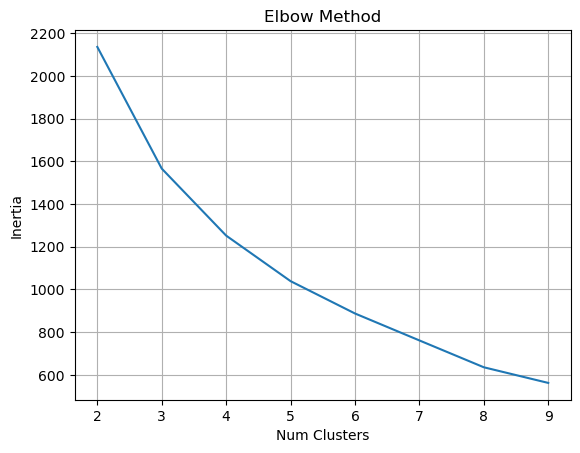

In [24]:
plt.plot(range(2,10), inertia)
plt.title('Elbow Method')
plt.xlabel('Num Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

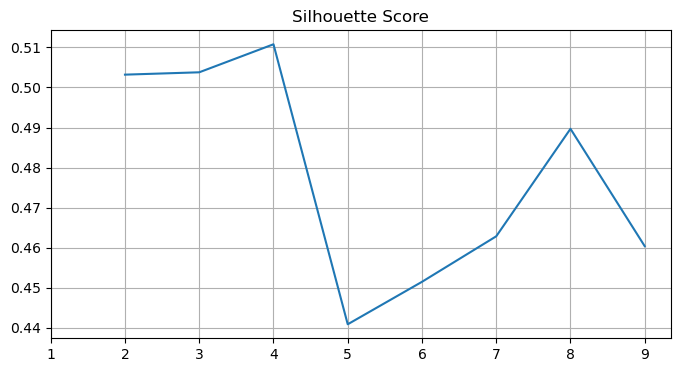

In [25]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), silh)
plt.title('Silhouette Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

In [26]:
# Choosing cluster 
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_columns)
kmeans_labels = kmeans.labels_

DBSCAN

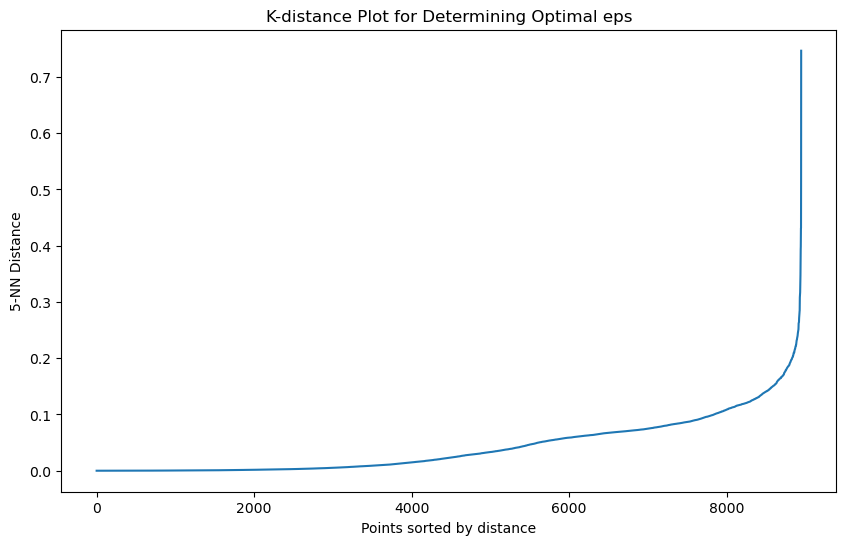

In [27]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Set the number of neighbors to min_samples
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(pca_columns.iloc[:, :4]) 
distances, indices = neighbors_fit.kneighbors(pca_columns.iloc[:, :4])

# Sort the distances and plot them
distances = np.sort(distances[:, min_samples - 1])  # Only take the distance to the k-th neighbor
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples}-NN Distance")
plt.title("K-distance Plot for Determining Optimal eps")
plt.show()

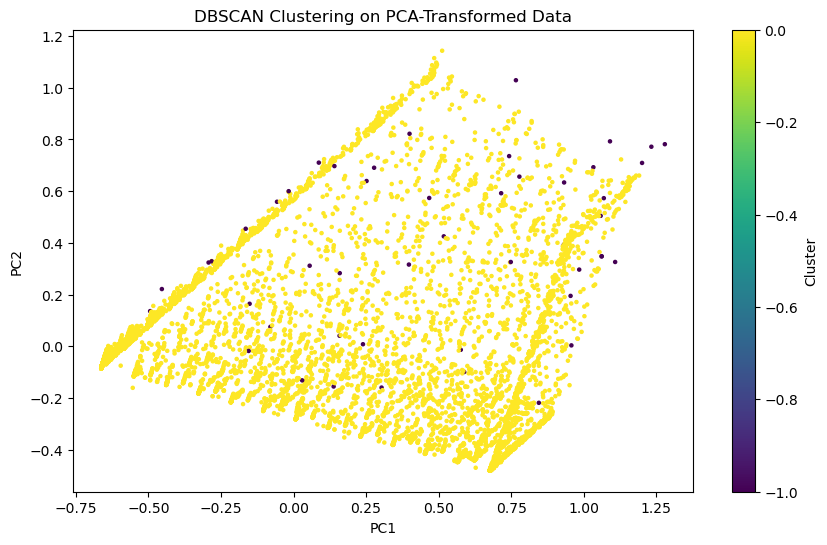

Number of clusters found: 2
Cluster labels: {0, -1}


In [28]:
# Step 1: Initialize DBSCAN model
# Note: eps and min_samples may need adjustment for optimal results

eps = 0.2  # Replace with the value you found from the k-distance plot
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)  # you might want to tune these parameters

# Step 2: Fit the model
dbscan_model = dbscan.fit(pca_columns)

# Step 3: Add the cluster labels to the PCA DataFrame
dbscan_labels = dbscan_model.labels_

# Optional: Visualize the clusters in the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_columns['PC1'], pca_columns['PC2'], c=dbscan_labels, cmap='viridis', s=5)
plt.colorbar(label='Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering on PCA-Transformed Data')
plt.show()

# Check the number of unique clusters
unique_clusters = set(dbscan_labels)
print(f"Number of clusters found: {len(unique_clusters)}")
print(f"Cluster labels: {unique_clusters}")

K-Medoids

In [29]:
inertia = []
silh = []

for i in range(2,10):
    kmedoids = KMedoids(n_clusters = i) 
    kmedoids.fit(pca_columns)
    inertia.append(kmedoids.inertia_)
    silh.append(silhouette_score(pca_columns, kmedoids.labels_))

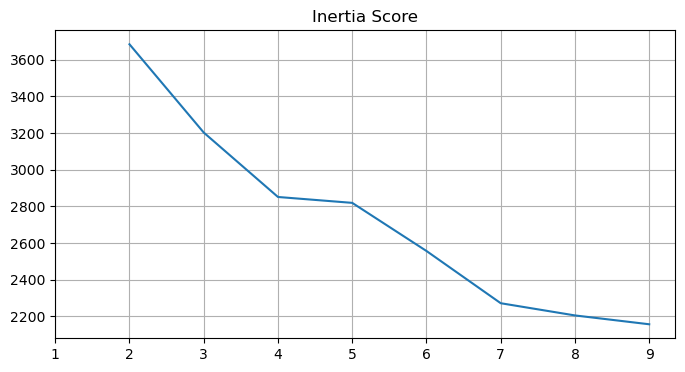

In [30]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), inertia)
plt.title('Inertia Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

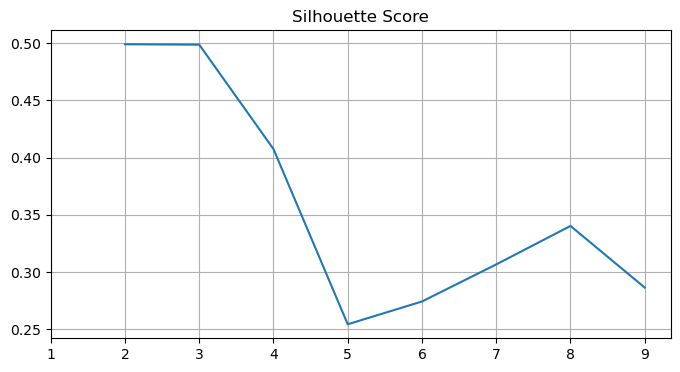

In [31]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), silh)
plt.title('Silhouette Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

In [32]:
# Final decision on numbers of cluster chosen: 3

kmedoids = KMedoids(n_clusters = 3)
kmedoids.fit(pca_columns)
kmedoids_labels = kmedoids.labels_

Evaluation

In [33]:
# K-Means silhouette score
kmeans_silhouette = silhouette_score(pca_columns.iloc[:, :4], kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette)

# DBSCAN silhouette score
dbscan_silhouette = silhouette_score(pca_columns.iloc[:, :4], dbscan_labels)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

# For K-Medoids
kmedoids_silhouette = silhouette_score(pca_columns.iloc[:, :4], kmedoids_labels)
print("K-Medoids Silhouette Score:", kmedoids_silhouette)

K-Means Silhouette Score: 0.5108523302921516
DBSCAN Silhouette Score: 0.2860222266695906
K-Medoids Silhouette Score: 0.4987438376261176


In [34]:
# Count of clusters and noise in DBSCAN
unique_clusters_dbscan = pd.Series(dbscan_labels).value_counts()
print("DBSCAN Cluster Distribution:\n", unique_clusters_dbscan)

# Count of clusters in K-Means
unique_clusters_kmeans = pd.Series(kmeans_labels).value_counts()
print("K-Means Cluster Distribution:\n", unique_clusters_kmeans)

# K-Medoids cluster distribution
unique_clusters_kmedoids = pd.Series(kmedoids_labels).value_counts()
print("K-Medoids Cluster Distribution:\n", unique_clusters_kmedoids)

DBSCAN Cluster Distribution:
  0    8901
-1      48
Name: count, dtype: int64
K-Means Cluster Distribution:
 1    4579
2    2220
3    1205
0     945
Name: count, dtype: int64
K-Medoids Cluster Distribution:
 2    4571
0    2895
1    1483
Name: count, dtype: int64


In [35]:
print("K-Means Inertia:", kmeans.inertia_)

print("K-Medoids Inertia:", kmedoids.inertia_)

K-Means Inertia: 1252.1878200864053
K-Medoids Inertia: 3202.449320262096


In [36]:
from sklearn.metrics import davies_bouldin_score

# K-Means DBI
kmeans_dbi = davies_bouldin_score(pca_columns.iloc[:, :4], kmeans_labels)
print("K-Means Davies-Bouldin Index:", kmeans_dbi)

# DBSCAN DBI
dbscan_dbi = davies_bouldin_score(pca_columns.iloc[:, :4], dbscan_labels)
print("DBSCAN Davies-Bouldin Index:", dbscan_dbi)

# K-Medoids DBI
kmedoids_dbi = davies_bouldin_score(pca_columns.iloc[:, :4], kmedoids_labels)
print("K-Medoids Davies-Bouldin Index:", kmedoids_dbi)


K-Means Davies-Bouldin Index: 0.9593268837110249
DBSCAN Davies-Bouldin Index: 1.5949391840646434
K-Medoids Davies-Bouldin Index: 1.0914792259659365


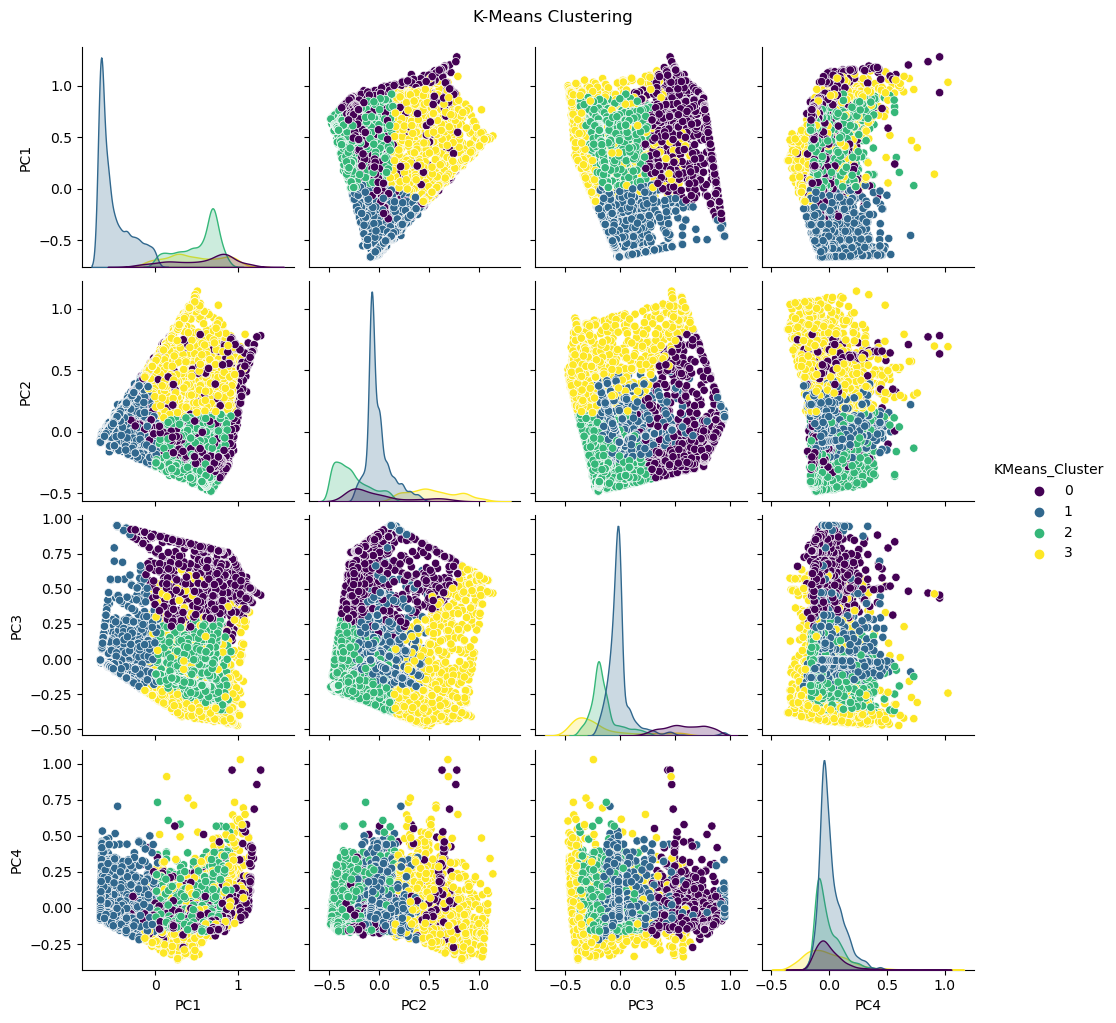

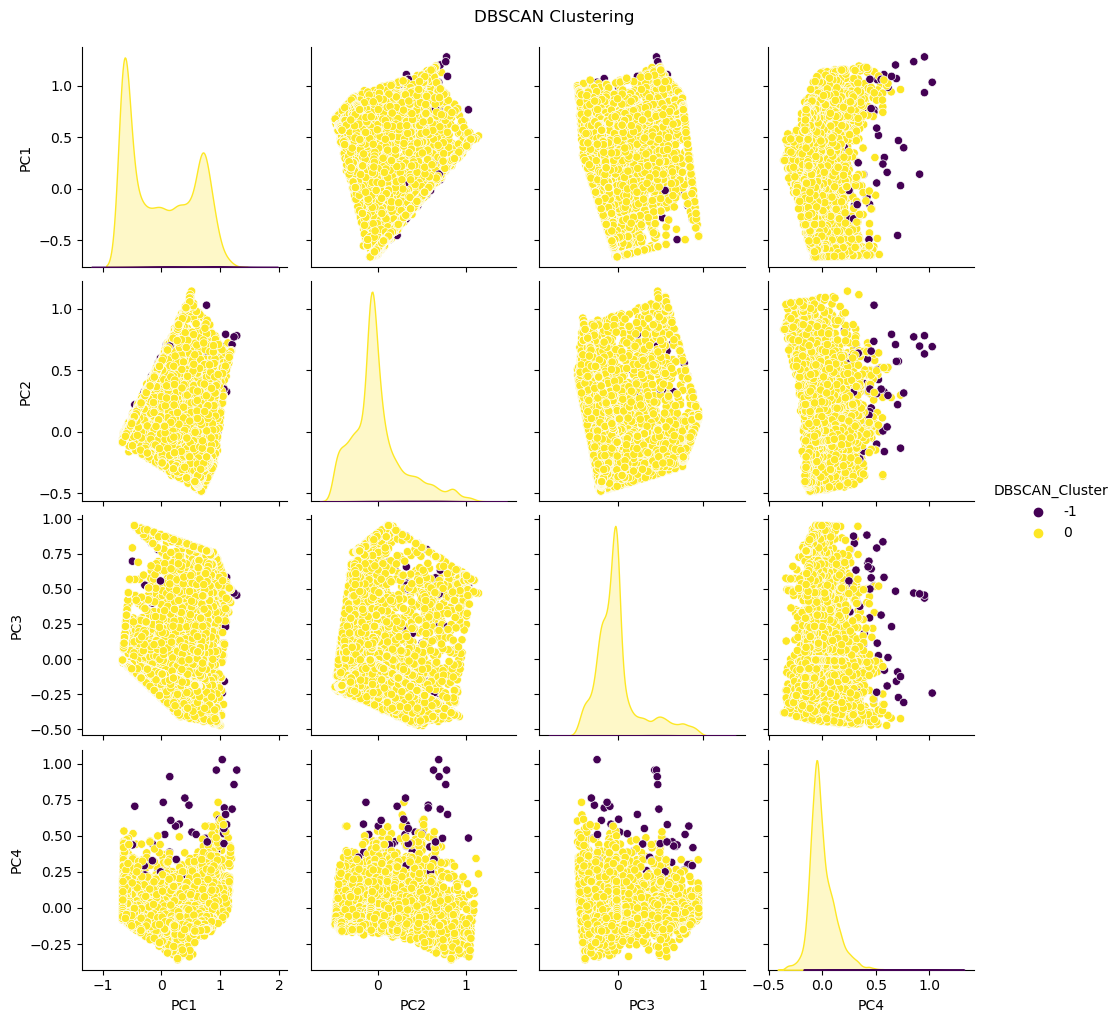

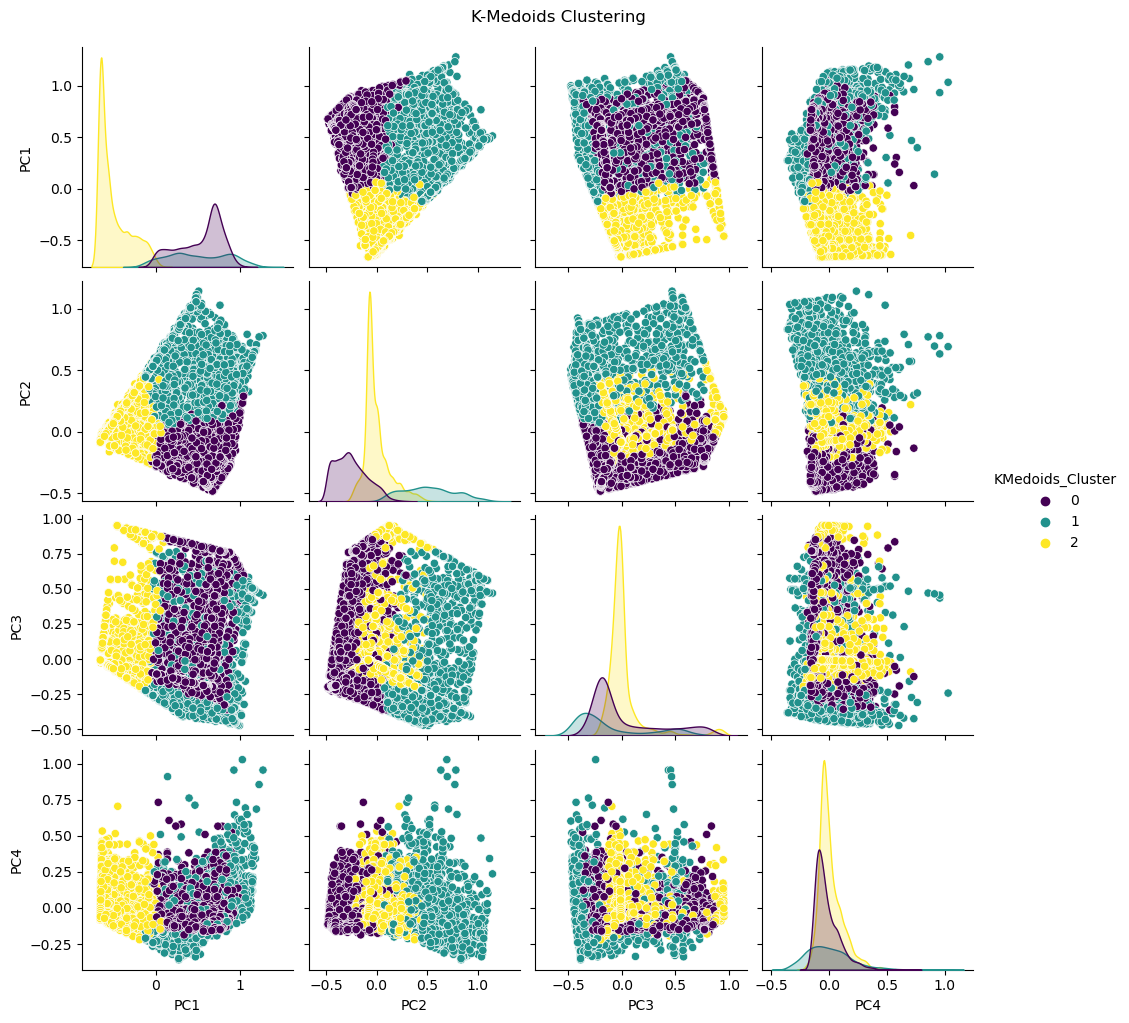

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adding labels to the PCA DataFrame for visualization
pca_columns['KMeans_Cluster'] = kmeans_labels
pca_columns['DBSCAN_Cluster'] = dbscan_labels
pca_columns['KMedoids_Cluster'] = kmedoids_labels

# Pair plots for K-Means
sns.pairplot(pca_columns, vars=['PC1', 'PC2', 'PC3', 'PC4'], hue='KMeans_Cluster', palette='viridis')
plt.suptitle("K-Means Clustering", y=1.02)
plt.show()

# Pair plots for DBSCAN
sns.pairplot(pca_columns, vars=['PC1', 'PC2', 'PC3', 'PC4'], hue='DBSCAN_Cluster', palette='viridis')
plt.suptitle("DBSCAN Clustering", y=1.02)
plt.show()

# Pair plots for K-Medoids
sns.pairplot(pca_columns, vars=['PC1', 'PC2', 'PC3', 'PC4'], hue='KMedoids_Cluster', palette='viridis')
plt.suptitle("K-Medoids Clustering", y=1.02)
plt.show()


K-Means is the best

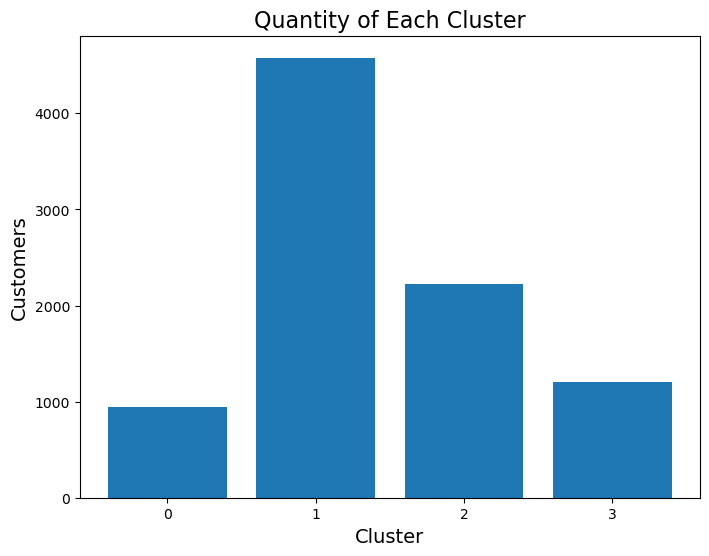

Cluster 0: 945
Cluster 1: 4579
Cluster 2: 2220
Cluster 3: 1205


In [38]:
labels, counts = np.unique(kmeans_labels, return_counts = True)

plt.figure(figsize = (8,6))
plt.title('Quantity of Each Cluster', size = 16)
plt.bar(labels, counts)
plt.xlabel('Cluster', size = 14)
plt.ylabel('Customers', size = 14)
plt.xticks(labels)
plt.show()

for i in zip(labels, counts):
    print('Cluster %s: %s' %(i[0],i[1]))

In [39]:
final_data = df1.copy()
final_data['Label'] = kmeans_labels

final_data.head()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Label
0,95.40,0.00,95.4,0.166667,0.000000,0.083333,2,1000.0,201.802084,139.509787,0.000000,1
1,0.00,0.00,0.0,0.000000,0.000000,0.000000,0,7000.0,4103.032597,1072.340217,0.222222,1
2,773.17,773.17,0.0,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,3
3,1499.00,1499.00,0.0,0.083333,0.083333,0.000000,1,7500.0,0.000000,0.000000,0.000000,1
4,16.00,16.00,0.0,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,1


In [40]:
# Calculate mean values of each feature by cluster
cluster_summary = final_data.groupby('Label').mean()
print(cluster_summary)

         PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
Label                                                          
0      1648.789630        736.607492              912.942963   
1       279.651415        226.267899               53.528974   
2      1182.315793        371.486847              811.415252   
3      2917.271510       2278.372515              638.898996   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
Label                                                    
0                 0.800619                    0.195740   
1                 0.135526                    0.078608   
2                 0.877474                    0.129797   
3                 0.882562                    0.812388   

       PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT  \
Label                                                                  
0                              0.710420      22.881481   4509.794292   
1                              0.056145       2.51

In [41]:
for i in range(4):
    print('Cluster:', i)
    display(final_data[final_data['Label'] == i].describe())
    print('\n')

Cluster: 0


,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Label
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.0
mean,1648.789630,736.607492,912.942963,0.800619,0.195740,0.710420,22.881481,4509.794292,1809.935829,189.717380,0.829996,0.0
std,3140.798372,2245.624518,1319.315272,0.238284,0.308801,0.293496,30.315689,3729.959548,3118.762798,276.429990,0.183189,0.0
min,28.800000,0.000000,0.000000,0.166667,0.000000,0.000000,2.000000,300.000000,34.401591,18.092319,0.400000,0.0
25%,360.000000,0.000000,269.880000,0.600000,0.000000,0.500000,8.000000,2000.000000,409.550536,131.584974,0.666667,0.0
50%,749.900000,0.000000,522.390000,0.916667,0.000000,0.833333,12.000000,3200.000000,876.723841,162.295285,0.900000,0.0
75%,1767.750000,555.000000,1095.000000,1.000000,0.333333,1.000000,24.000000,6000.000000,1936.724441,177.969765,1.000000,0.0
max,40040.710000,33803.840000,15497.190000,1.000000,1.000000,1.000000,358.000000,28000.000000,35843.625930,4553.156050,1.000000,0.0




Cluster: 1


,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Label
count,4579.000000,4579.000000,4579.000000,4579.000000,4579.000000,4579.000000,4579.000000,4579.000000,4579.000000,4579.000000,4579.000000,4579.0
mean,279.651415,226.267899,53.528974,0.135526,0.078608,0.056145,2.517143,4129.734559,1475.175770,832.174164,0.049263,1.0
std,757.022210,711.737864,246.684262,0.163048,0.120246,0.115901,4.741445,3327.499329,2622.116165,2138.533619,0.139802,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,316.493347,171.630136,0.000000,1.0
50%,45.650000,0.000000,0.000000,0.083333,0.000000,0.000000,1.000000,3000.000000,675.426241,374.993899,0.000000,1.0
75%,295.330000,200.000000,0.000000,0.250000,0.090909,0.000000,4.000000,6000.000000,1539.465228,846.042195,0.000000,1.0
max,22101.780000,22101.780000,12541.000000,0.583333,0.545455,0.454545,186.000000,23000.000000,50721.483360,61031.618600,1.000000,1.0




Cluster: 2


,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Label
count,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.0
mean,1182.315793,371.486847,811.415252,0.877474,0.129797,0.827320,23.267568,4115.910228,1557.875501,1176.744847,0.060124,2.0
std,1476.879490,756.728211,1070.075302,0.155314,0.176272,0.184881,23.969496,3420.585990,2319.401226,3356.211291,0.114381,0.0
min,12.000000,0.000000,12.000000,0.500000,0.000000,0.333333,0.000000,450.000000,0.000000,0.000000,0.000000,2.0
25%,346.012500,0.000000,272.797500,0.750000,0.000000,0.666667,11.000000,1500.000000,399.661474,171.241162,0.000000,2.0
50%,674.410000,0.000000,499.920000,1.000000,0.000000,0.909091,15.000000,3000.000000,874.306795,380.548620,0.000000,2.0
75%,1498.145000,426.205000,990.362500,1.000000,0.250000,1.000000,27.000000,6000.000000,1792.366515,1028.161426,0.083333,2.0
max,22500.000000,9805.730000,22500.000000,1.000000,0.666667,1.000000,347.000000,23000.000000,40627.595240,76406.207520,0.500000,2.0




Cluster: 3


,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Label
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.0
mean,2917.271510,2278.372515,638.898996,0.882562,0.812388,0.412140,38.879668,6565.723878,2977.531632,767.227650,0.192821,3.0
std,3735.462723,3175.245682,1157.895807,0.149920,0.184584,0.373663,37.283813,4332.307422,4092.200850,1326.794777,0.304973,0.0
min,8.400000,8.400000,0.000000,0.500000,0.333333,0.000000,5.000000,300.000000,0.000000,0.000000,0.000000,3.0
25%,983.770000,802.100000,0.000000,0.750000,0.666667,0.000000,16.000000,3000.000000,922.603695,185.468819,0.000000,3.0
50%,1902.400000,1432.860000,232.500000,1.000000,0.833333,0.416667,27.000000,6000.000000,1783.396008,330.428974,0.000000,3.0
75%,3591.810000,2606.420000,780.000000,1.000000,1.000000,0.750000,46.000000,9000.000000,3484.429075,920.287770,0.272727,3.0
max,49039.570000,40761.250000,12560.850000,1.000000,1.000000,1.000000,344.000000,30000.000000,46930.598240,21235.065300,1.000000,3.0


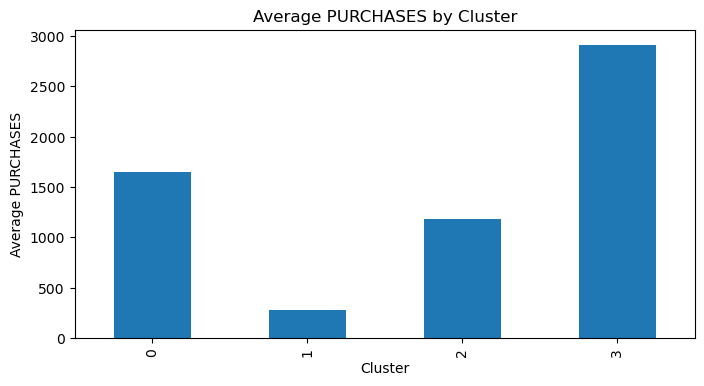

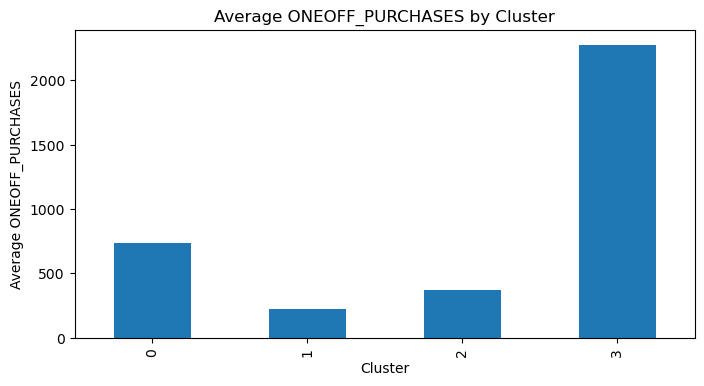

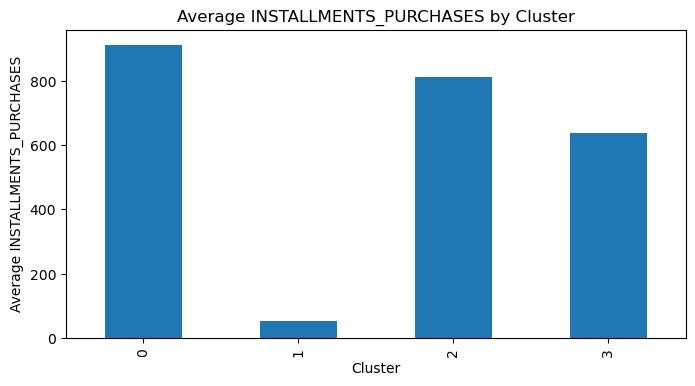

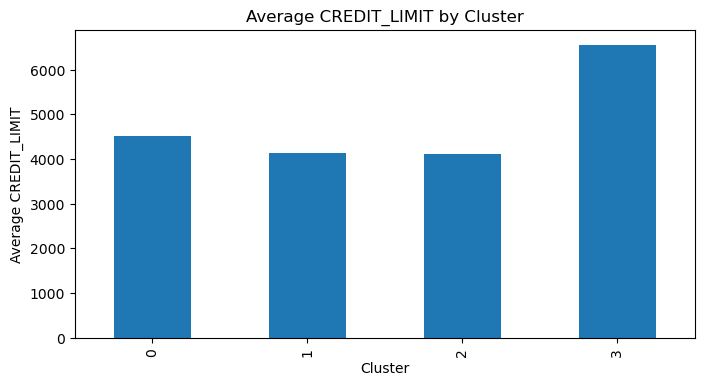

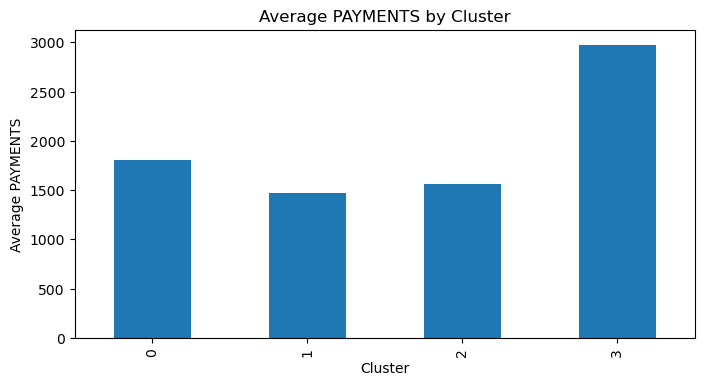

In [42]:
import matplotlib.pyplot as plt

# Plotting the mean of selected features by cluster
features_to_plot = ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    cluster_summary[feature].plot(kind='bar')
    plt.title(f"Average {feature} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(f"Average {feature}")
    plt.show()
